<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-2/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def load_data(name):
    labels = []
    images = []
    with open(name, 'r') as f:
        for row in f:
            row = row.strip().split(' ')
            row=np.array(row).astype(float)
            #print(row.shape)

            label=row[0]
            image = row[1:]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

def featExtrct(name):

    images, labels = load_data(name)
    images = images.reshape(-1, 16, 16)
    #images = (images+1)/2 #mapping from 0 to 255

    indselect = (labels == 1) | (labels == 5)
    images = images[indselect]
    labels = labels[indselect]
    # Extract feature

    #intensity
    inten = images.reshape(-1, 16*16).mean(axis=-1)

    #symmetry

    symall=[]
    for i in range(len(images)):
        sym1 = np.abs(np.fliplr(images[i]) - images[i]) +np.abs(np.flipud(images[i]) - images[i])

        symall.append(sym1)
    symall=np.array(symall)
    print(symall.shape)
    sym=np.array(symall.reshape(len(images),-1).mean(axis=-1))
    print('sym shape')

    #plotting features
    i1 = (labels == 1)
    i5 = (labels == 5)
    labels = np.zeros(len(labels))
    labels[i1] = 1
    labels[i5] = -1

    featvector = np.concatenate((inten[:, None], sym[:, None]), axis=1)

    plt.figure()
    plt.scatter(inten[i1], sym[i1], c='b', marker='o', label='digit 1 feature')
    plt.scatter(inten[i5], sym[i5], c='r', marker='x', label='digit 5 feature')
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Vertical Symmetry')
    plt.title('For the file named:'+name)
    plt.show()



    return featvector, labels


(1561, 16, 16)
sym shape


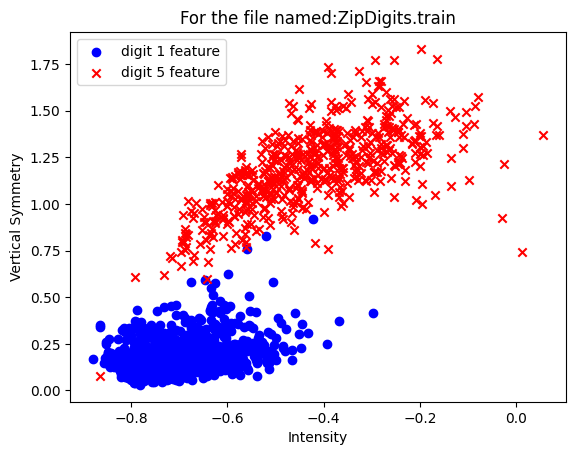

(424, 16, 16)
sym shape


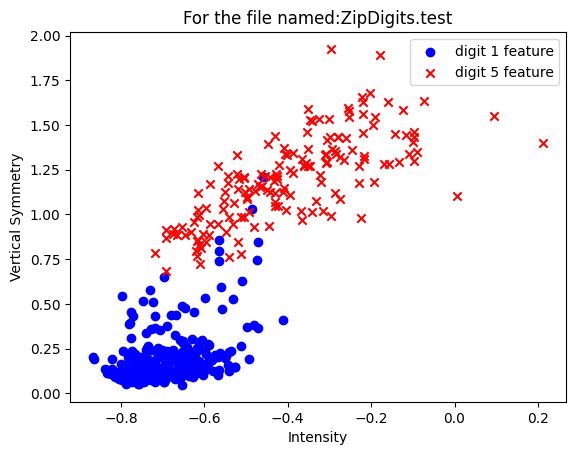

In [3]:
trainfile = 'ZipDigits.train'
testfile = 'ZipDigits.test'
#Data collect
traindata, trainlabel= featExtrct(trainfile)
testdata, testlabel=featExtrct(testfile)

#Padded with 1
trDataPadded = np.concatenate((np.ones((len(traindata), 1)), traindata), axis=1)
tsDataPadded= np.concatenate((np.ones((len(testdata), 1)), testdata), axis=1)

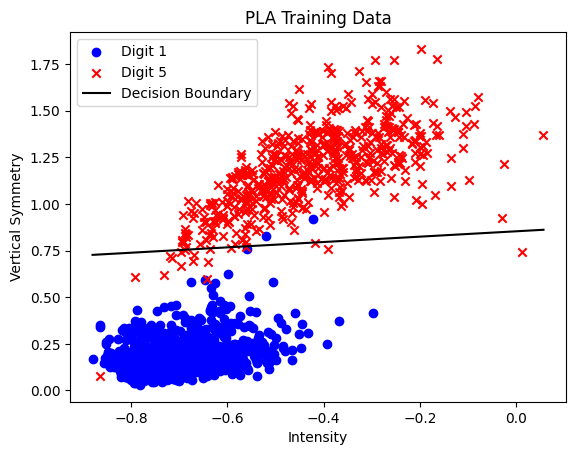

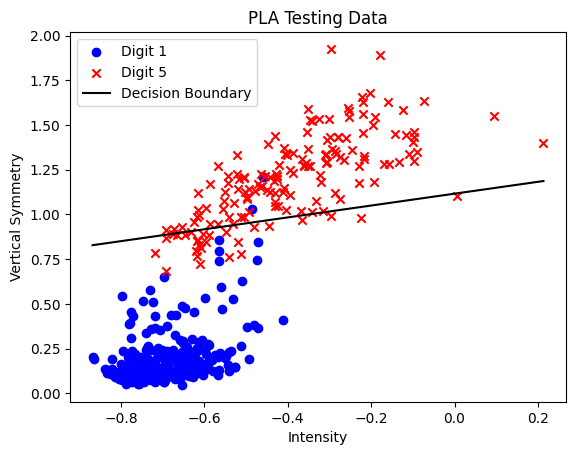

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Perceptron Learning Algorithm
def pla(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])  # Initialize the weight vector to zeros
    for _ in range(max_iter):
        misclassified = np.where(y * np.dot(X, w) <= 0)[0]
        if len(misclassified) == 0:
            break
        random_misclassified = np.random.choice(misclassified)
        w += y[random_misclassified] * X[random_misclassified]
    return w


# Assuming you have trDataPadded as the training data with a bias term
# and trainlabel as the corresponding labels (-1 or 1)
w = pla(trDataPadded, trainlabel, max_iter=1000)

# Plot the data points
plt.figure()
plt.scatter(trDataPadded[trainlabel == 1, 1], trDataPadded[trainlabel == 1, 2], c='b', marker='o', label='Digit 1')
plt.scatter(trDataPadded[trainlabel == -1, 1], trDataPadded[trainlabel == -1, 2], c='r', marker='x', label='Digit 5')

# Plot the decision boundary
x_decision = np.linspace(min(trDataPadded[:, 1]), max(trDataPadded[:, 1]), 100)
y_decision = (-w[0] - w[1] * x_decision) / w[2]
plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Vertical Symmetry')
plt.title('PLA Training Data')
plt.show()

#Testing Data
w = pla(tsDataPadded, testlabel, max_iter=1000)

# Plot the data points
plt.figure()
plt.scatter(tsDataPadded[testlabel == 1, 1], tsDataPadded[testlabel == 1, 2], c='b', marker='o', label='Digit 1')
plt.scatter(tsDataPadded[testlabel == -1, 1], tsDataPadded[testlabel == -1, 2], c='r', marker='x', label='Digit 5')

# Plot the decision boundary
x_decision = np.linspace(min(tsDataPadded[:, 1]), max(tsDataPadded[:, 1]), 100)
y_decision = (-w[0] - w[1] * x_decision) / w[2]
plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Vertical Symmetry')
plt.title('PLA Testing Data')
plt.show()

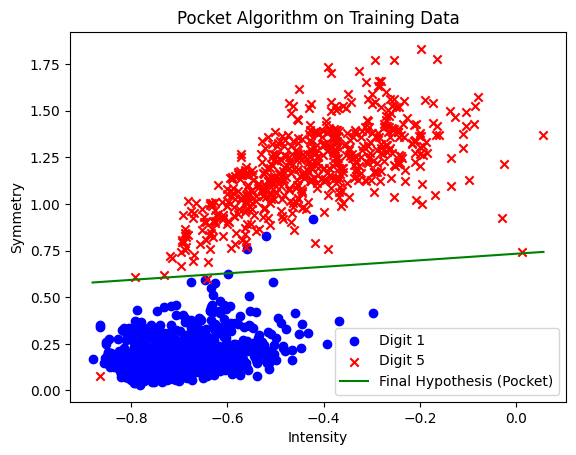

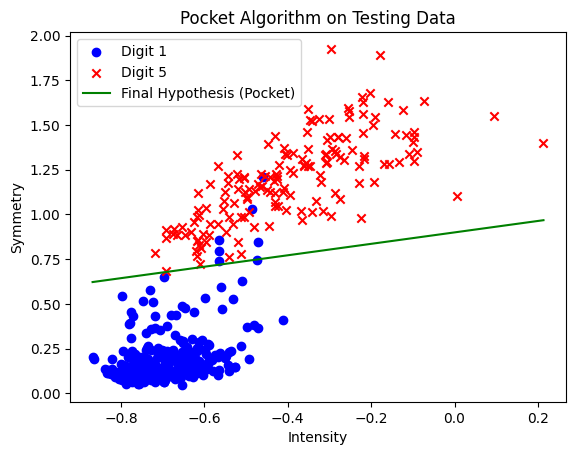

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Implement the Pocket algorithm
def pocket(X, y, max_iterations=1000):
    w_pocket = np.zeros(X.shape[1])
    w_best = np.zeros(X.shape[1])
    best_error = float('inf')

    for iteration in range(max_iterations):
        misclassified = np.where(y * (X.dot(w_pocket)) <= 0)[0]

        if len(misclassified) == 0:
            break  # All data points are correctly classified

        random_misclassified_idx = np.random.choice(misclassified)
        x_misclassified = X[random_misclassified_idx]

        # Update weights
        w_pocket += y[random_misclassified_idx] * x_misclassified

        # Calculate the error on the entire dataset
        error = np.mean(np.sign(X.dot(w_pocket)) != y)

        if error < best_error:
            best_error = error
            w_best = w_pocket.copy()

    return w_best

# Assume you have already loaded and preprocessed your training data
# trDataPadded and trainlabel for training

# Run the Pocket algorithm on the training data
w_final_pocket = pocket(trDataPadded, trainlabel)

# Plot the training data and the final hypothesis
plt.scatter(trDataPadded[trainlabel == 1][:, 1], trDataPadded[trainlabel == 1][:, 2], label='Digit 1', marker='o', c='b')
plt.scatter(trDataPadded[trainlabel == -1][:, 1], trDataPadded[trainlabel == -1][:, 2], label='Digit 5', marker='x', c='r')

# Plot the final hypothesis
x = np.linspace(min(trDataPadded[:, 1]), max(trDataPadded[:, 1]), 100)
y = (-w_final_pocket[0] - w_final_pocket[1] * x) / w_final_pocket[2]
plt.plot(x, y, label='Final Hypothesis (Pocket)', c='g')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Pocket Algorithm on Training Data')
plt.show()


#Test Dataset
w_final_pocket = pocket(tsDataPadded, testlabel)

# Plot the training data and the final hypothesis
plt.scatter(tsDataPadded[testlabel == 1][:, 1], tsDataPadded[testlabel == 1][:, 2], label='Digit 1', marker='o', c='b')
plt.scatter(tsDataPadded[testlabel == -1][:, 1], tsDataPadded[testlabel == -1][:, 2], label='Digit 5', marker='x', c='r')

# Plot the final hypothesis
x = np.linspace(min(tsDataPadded[:, 1]), max(tsDataPadded[:, 1]), 100)
y = (-w_final_pocket[0] - w_final_pocket[1] * x) / w_final_pocket[2]
plt.plot(x, y, label='Final Hypothesis (Pocket)', c='g')

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Pocket Algorithm on Testing Data')
plt.show()



<ipython-input-6-81e9cca51296>:75: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, zz, levels=[0], colors='g', linewidths=2, label='Final Hypothesis (3rd Order Poly)')


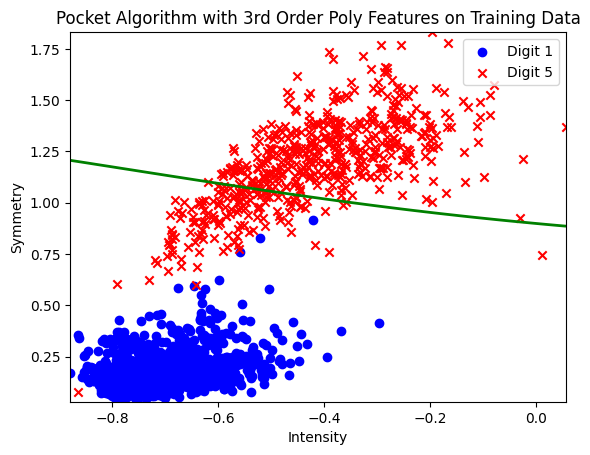

Pocket Test Error (3rd Order Poly): 0.018867924528301886


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Implement the Pocket algorithm
def pocket(X, y, max_iterations=1000):
    w_pocket = np.zeros(X.shape[1])
    w_best = np.zeros(X.shape[1])
    best_error = float('inf')

    for iteration in range(max_iterations):
        misclassified = np.where(y * (X.dot(w_pocket)) <= 0)[0]

        if len(misclassified) == 0:
            break  # All data points are correctly classified

        random_misclassified_idx = np.random.choice(misclassified)
        x_misclassified = X[random_misclassified_idx]

        # Update weights
        w_pocket += y[random_misclassified_idx] * x_misclassified

        # Calculate the error on the entire dataset
        error = np.mean(np.sign(X.dot(w_pocket)) != y)

        if error < best_error:
            best_error = error
            w_best = w_pocket.copy()

    return w_best

# Assume you have already loaded and preprocessed your training and testing data
# trDataPadded and trainlabel for training, tsDataPadded and testlabel for testing

# Define a function to generate third-order polynomial features
def generate_third_order_polynomial_features(X):
    num_samples, num_features = X.shape
    extended_features = np.zeros((num_samples, num_features + 10))  # 10 new features for third-order polynomials
    extended_features[:, :num_features] = X

    # Generate third-order polynomial features
    for i in range(num_samples):
        sample = X[i]
        extended_features[i, num_features] = sample[1] ** 2  # x^2
        extended_features[i, num_features + 1] = sample[1] ** 3  # x^3
        extended_features[i, num_features + 2] = sample[2] ** 2  # y^2
        extended_features[i, num_features + 3] = sample[2] ** 3  # y^3
        extended_features[i, num_features + 4] = sample[1] * sample[2]  # xy
        extended_features[i, num_features + 5] = sample[1] ** 2 * sample[2]  # x^2y
        extended_features[i, num_features + 6] = sample[1] * sample[2] ** 2  # xy^2
        extended_features[i, num_features + 7] = sample[1] ** 3 * sample[2]  # x^3y
        extended_features[i, num_features + 8] = sample[1] * sample[2] ** 3  # xy^3
        extended_features[i, num_features + 9] = sample[1] ** 3 * sample[2] ** 3  # x^3y^3

    return extended_features

# Apply the third-order polynomial feature transformation
trDataPoly = generate_third_order_polynomial_features(trDataPadded)
tsDataPoly = generate_third_order_polynomial_features(tsDataPadded)

# Run the Pocket algorithm on the transformed training data
w_final_poly = pocket(trDataPoly, trainlabel)

# Plot the training data and the final hypothesis
plt.scatter(trDataPadded[trainlabel == 1][:, 1], trDataPadded[trainlabel == 1][:, 2], label='Digit 1', marker='o', c='b')
plt.scatter(trDataPadded[trainlabel == -1][:, 1], trDataPadded[trainlabel == -1][:, 2], label='Digit 5', marker='x', c='r')

# Plot the final hypothesis
# ...

# Plot the final hypothesis (3rd Order Polynomial)
x = np.linspace(min(trDataPadded[:, 1]), max(trDataPadded[:, 1]), 100)
y = np.linspace(min(trDataPadded[:, 2]), max(trDataPadded[:, 2]), 100)
xx, yy = np.meshgrid(x, y)
zz = w_final_poly[0] + w_final_poly[1] * xx + w_final_poly[2] * yy + w_final_poly[3] * xx**2 + w_final_poly[4] * yy**2 + w_final_poly[5] * xx**3 + w_final_poly[6] * yy**3 + w_final_poly[7] * xx**2 * yy + w_final_poly[8] * xx * yy**2 + w_final_poly[9] * xx**3 * yy + w_final_poly[10] * xx * yy**3
plt.contour(xx, yy, zz, levels=[0], colors='g', linewidths=2, label='Final Hypothesis (3rd Order Poly)')

# ...

plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Pocket Algorithm with 3rd Order Poly Features on Training Data')
plt.show()

# Report the test error for the transformed testing data
tsDataPoly = generate_third_order_polynomial_features(tsDataPadded)
pocket_test_predictions_poly = np.sign(tsDataPoly.dot(w_final_poly))
pocket_test_error_poly = np.mean(pocket_test_predictions_poly != testlabel)

print(f"Pocket Test Error (3rd Order Poly): {pocket_test_error_poly}")
